# Locally Weighted Linear Regression

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from utils import load_dataset
from linear_model import LinearModel

In [2]:
X_train, y_train = load_dataset('data/ds5_train.csv', intercept=True)
X_test, y_test = load_dataset('data/ds5_test.csv', intercept=True)
X_valid, y_valid = load_dataset('data/ds5_valid.csv', intercept=True)

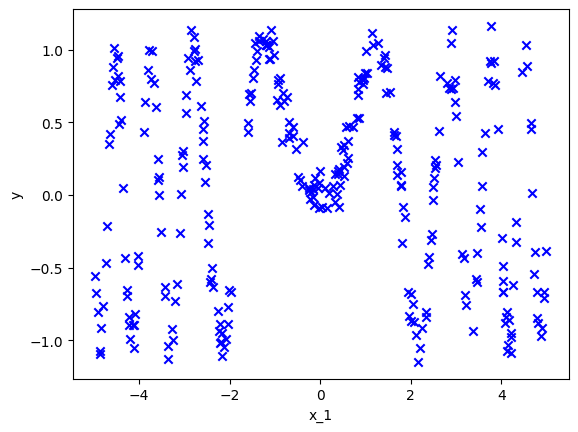

In [3]:
plt.xlabel('x_1')
plt.ylabel('y')
plt.scatter(X_train[:, -1], y_train, marker='x', c='b')

In [4]:
class LocallyWeightedLinearRegressionModel(LinearModel):
    """ 
    Locally Weighted Linear Regression Model (LWR)
    """
    def __init__(self, tau):
        super(LocallyWeightedLinearRegressionModel, self).__init__()
        self.tau = tau
        self.X = None
        self.y = None

    def fit(self, X, y):
        """ 
        Fit LWR by saving the training set
        """
        self.X = X
        self.y = y

    def predict(self, X):
        """ 
        Make predictions given inputs X
        """
        n, d = X.shape

        w = np.exp(- np.linalg.norm(self.X - np.reshape(X, (n, 1, d)), ord=2, axis=2)**2 / (2 * self.tau**2))

        W = np.apply_along_axis(np.diag, axis=1, arr=w)

        theta = np.linalg.inv(self.X.T @ W @ self.X) @ self.X.T @ W @ self.y

        return np.einsum('ij, ij->i', X, theta)

In [5]:
lwr = LocallyWeightedLinearRegressionModel(tau=0.5)
lwr.fit(X_train, y_train)

In [6]:
def plot(X, y_label, y_hat, title):
    plt.scatter(X[:, -1], y_label, marker='x', color='b', label='label')
    plt.scatter(X[:, -1], y_hat, marker='o', color='r', label='prediction')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

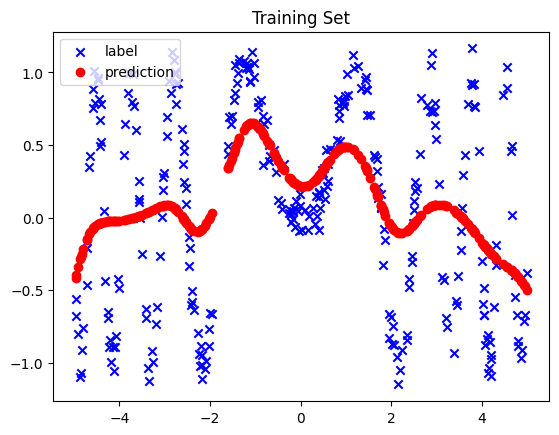

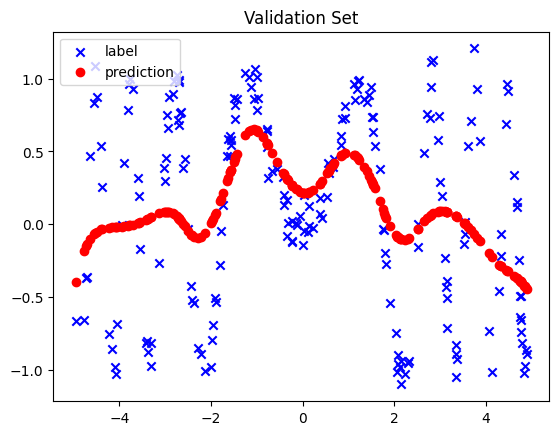

In [7]:
y_train_hat = lwr.predict(X_train)
plot(X_train, y_train, y_train_hat, 'Training Set')

y_valid_hat = lwr.predict(X_valid)
plot(X_valid, y_valid, y_valid_hat, 'Validation Set')

underfitting

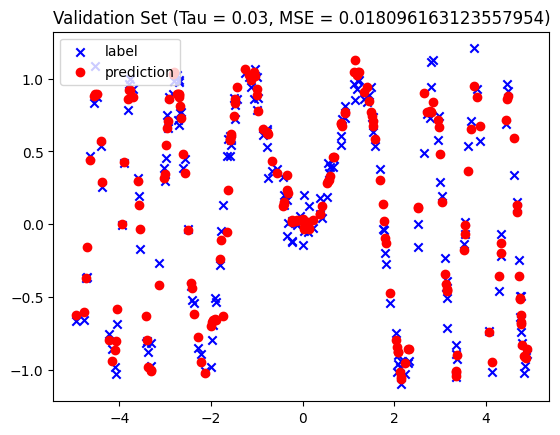

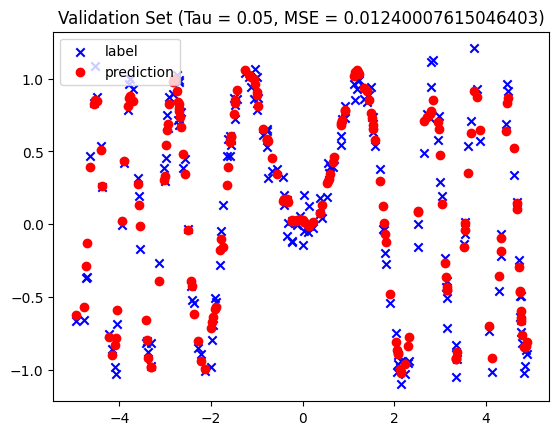

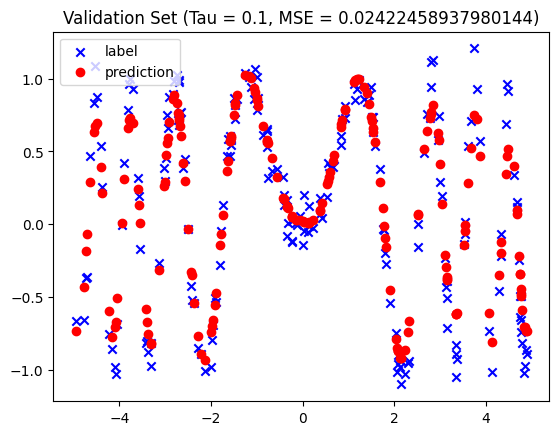

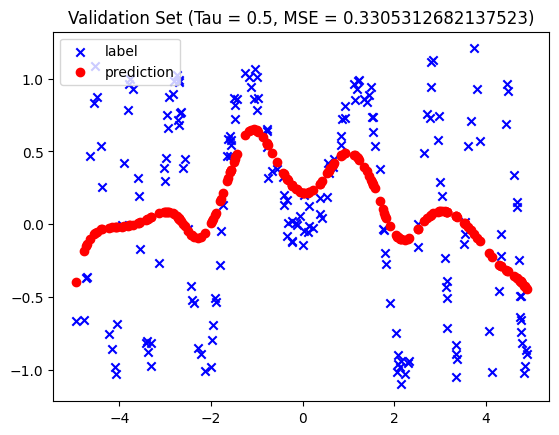

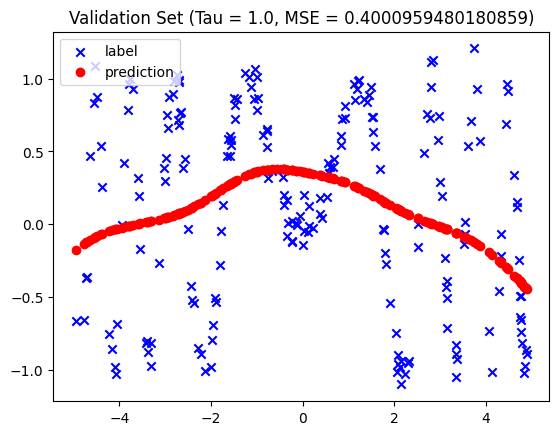

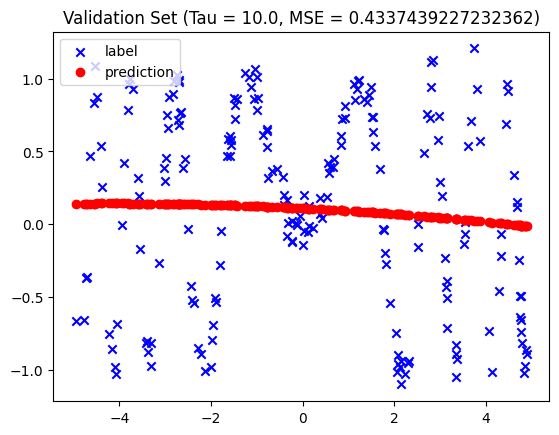

Tau = 0.05 achieves the lowest MSE on the validation set


In [8]:
taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]

lowest_mse = math.inf
best_tau = taus[0]

for tau in taus:
    lwr = LocallyWeightedLinearRegressionModel(tau)
    lwr.fit(X_train, y_train)
    y_valid_hat = lwr.predict(X_valid)

    mse = np.mean((y_valid_hat - y_valid)**2)
    if mse < lowest_mse:
        lowest_mse = mse
        best_tau = tau

    plot(X_valid, y_valid, y_valid_hat, f"Validation Set (Tau = {tau}, MSE = {mse})")

print(f"Tau = {best_tau} achieves the lowest MSE on the validation set")    

Use $\tau = 0.05$ to make predictions on test set

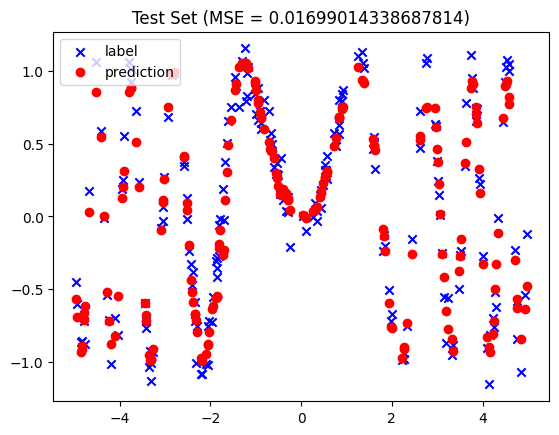

In [9]:
lwr = LocallyWeightedLinearRegressionModel(tau=0.05)
lwr.fit(X_train, y_train)
y_test_hat = lwr.predict(X_test)

plot(X_test, y_test, y_test_hat, f"Test Set (MSE = {np.mean((y_test_hat - y_test)**2)})")